## NeuralProphet example (https://neuralprophet.com/)

In [ ]:
#Run if needed
#!pip install --upgrade plotly neuralprophet

In [ ]:
# Windows local host
#filepath = 'C:/Users/Alber/PHB009/PHB009/dataset/model/combined_data.csv'
filepath = 'G:/My Drive/PHB009/dataset/model/combined_data.csv'
# Google Colab
#filepath = '/content/drive/MyDrive/PHB009/dataset/model/combined_data.csv'

In [ ]:
train_end = '2023-01-01'
test_start = '2023-01-01'

## Weekly Prediction with graphs
Execution with Fine-tuned model

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-MON corresponds to 99.617% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-Mon
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-MON corresponds to 99.617% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-Mon
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-MON corresponds to 99.648% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-Mon
INFO - (NP.df_utils._infer_frequency) - Major frequency W-MON corresponds to 99.648% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-Mon


Predicting: 3it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


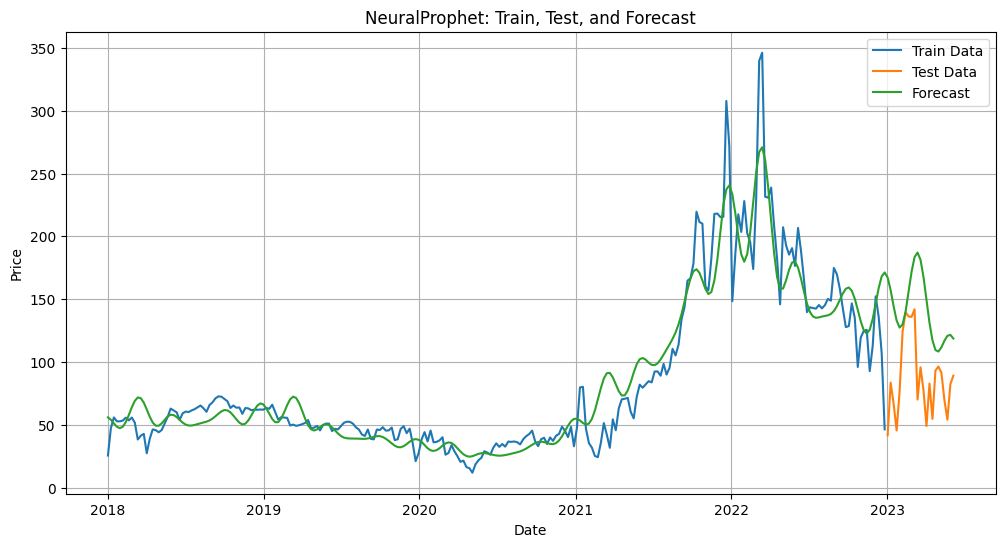

In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv(filepath)

# Convert the date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

aggregation_functions = {}

for col in data.columns:
    if col == 'Price':
       aggregation_functions[col] = 'mean'
    elif col == 'Open':
        aggregation_functions[col] = 'first'
    elif col == 'High':
        aggregation_functions[col] = 'max'
    elif col == 'Low':
        aggregation_functions[col] = 'min'
    elif col == 'Close':
        aggregation_functions[col] = 'last'
    else:
        aggregation_functions[col] = 'mean'

# Resample and aggregate by weekly intervals
data_weekly = data.resample('W-Mon', closed='right', label='right').agg(aggregation_functions)

# Recover 'Date' as a column and reset the index
data_weekly.reset_index(inplace=True)

# Rename the columns to 'ds' and 'y' for NeuralProphet
model_data = data_weekly.rename(columns={'Date': 'ds', 'Price': 'y'})[['ds', 'y']]

# Split the data into training and testing sets
train_data = model_data[model_data['ds'] < train_end]
test_data = model_data[model_data['ds'] >= test_start]

# Create a NeuralProphet model
model = NeuralProphet(
    batch_size=128,  # Set the batch size for training
    epochs=100,      # Set the number of training epochs
    learning_rate=0.1,  # Set the learning rate for the optimizer
    seasonality_mode="multiplicative",  # Set the seasonality mode
    yearly_seasonality=True,  # Enable yearly seasonality
    weekly_seasonality=False,  # Disable yearly seasonality
    daily_seasonality=False, # Disable daily seasonality
    n_changepoints=100,  # Set the number of changepoints for trend flexibility

)

model.set_plotting_backend("plotly")  # show plots correctly in jupyter notebooks

# Fit the model to the training data
model.fit(train_data, freq='W-Mon')

# Specify the number of periods to forecast (e.g., 52 for one year)
future_periods = 23

# Generate future dates for prediction
future_dates = model.make_future_dataframe(train_data, periods=future_periods, n_historic_predictions=len(train_data))

# Make predictions
forecast = model.predict(future_dates)

# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
#df_future = model.make_future_dataframe(train_data, n_historic_predictions=True, periods=future_periods)

# Predict the future
#forecast = model.predict(future_dates)

# Plot the train, test, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Data')
plt.plot(test_data['ds'], test_data['y'], label='Test Data')
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NeuralProphet: Train, Test, and Forecast')
plt.legend()
plt.grid(True)
plt.show()

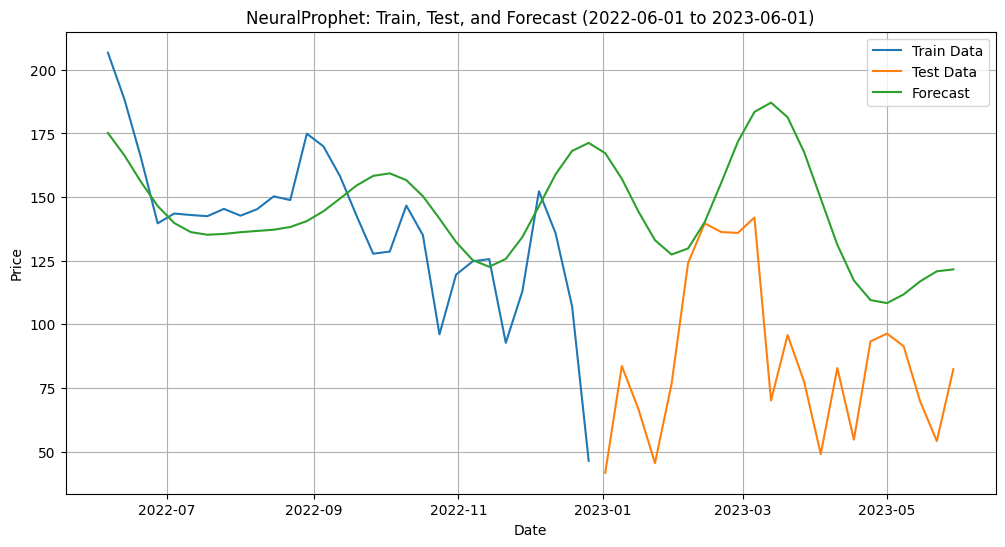

In [ ]:
# Filter data for the desired period
start_date = '2022-06-01'
end_date = '2023-06-01'
train_data_filtered = train_data[(train_data['ds'] >= start_date) & (train_data['ds'] <= end_date)]
test_data_filtered = test_data[(test_data['ds'] >= start_date) & (test_data['ds'] <= end_date)]
forecast_filtered = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]

# Plot the filtered train, test, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data_filtered['ds'], train_data_filtered['y'], label='Train Data')
plt.plot(test_data_filtered['ds'], test_data_filtered['y'], label='Test Data')
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat1'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NeuralProphet: Train, Test, and Forecast (2022-06-01 to 2023-06-01)')
plt.legend()
plt.grid(True)
plt.show()

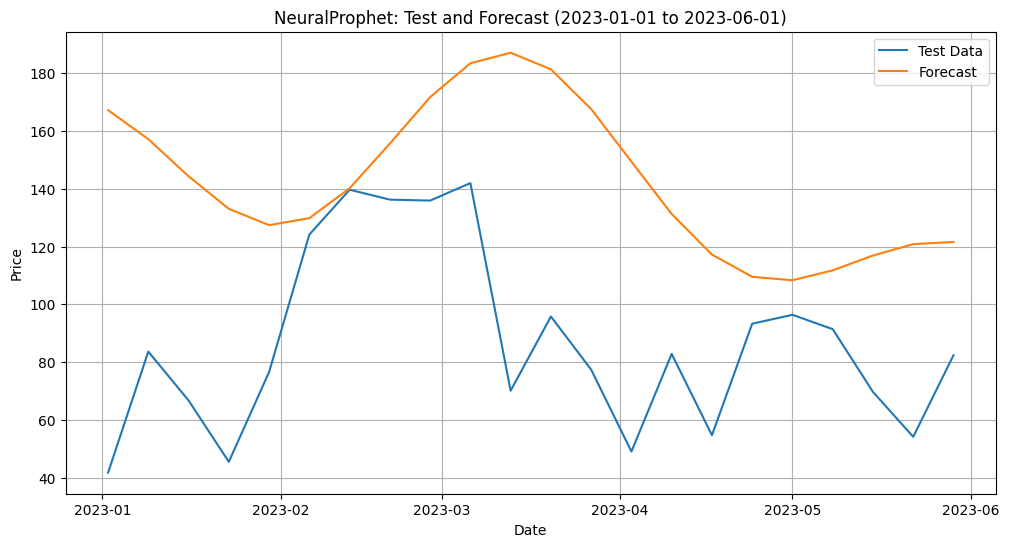

In [ ]:
# Filter data for the desired period
start_date = '2023-01-01'
end_date = '2023-06-01'
test_data_filtered = test_data[(test_data['ds'] >= start_date) & (test_data['ds'] <= end_date)]
forecast_filtered = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]

# Plot the filtered train, test, and forecast
plt.figure(figsize=(12, 6))
plt.plot(test_data_filtered['ds'], test_data_filtered['y'], label='Test Data')
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat1'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NeuralProphet: Test and Forecast (2023-01-01 to 2023-06-01)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming forecast_filtered and test_data_filtered are DataFrames

# Copy the forecast_filtered DataFrame to avoid modifying the original data
forecast_filtered_copy = forecast_filtered.copy()

# Assign the 'y' values from test_data_filtered to the copy
forecast_filtered_copy.loc[:, 'y'] = test_data_filtered['y'].values

# Extract actual values
actual_values = forecast_filtered_copy['y'].values

# Extract predicted values
predicted_values = forecast_filtered_copy['yhat1'].values[-future_periods:]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 65.85


Compare results with weekly average daily forecast

In [ ]:
# Read the time series data into a DataFrame
np_df = pd.read_csv('G:/My Drive/PHB009/dataset/model/results/1DNeuralProphetResults.csv', parse_dates=['Date'], usecols=range(1,4))

# Set the 'Date' column as the index
np_df.set_index('Date', inplace=True)

np_df = np_df.loc['2023-01-02':'2023-06-01']

# Resample the data to 4-week frequency
np_df = np_df.resample('1W-Mon').mean()  # You can use other aggregation functions if needed

# Extract actual values
actual_values = np_df['Price'].values

# Extract predicted values
predicted_values = np_df['Prediction'].values

# Calculate RMSE
rmseDailyAverage = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"Root Mean Squared Error (RMSE): {rmseDailyAverage:.2f}")

Root Mean Squared Error (RMSE): 28.47


In [ ]:
# Rename the 'Demand' column to 'volume'
forecast_filtered_copy.rename(columns={'ds': 'Date', 'y':'Price','yhat1':'Prediction'}, inplace=True)

In [ ]:
# Reset the index
forecast_filtered_copy.reset_index(drop=True, inplace=True)

In [ ]:
# Save weekly model or daily model with weekly avg depending on rmse results
if (rmseDailyAverage > rmse):
    # Keeping weekly model
    forecast_filtered_copy[['Date','Price','Prediction']].to_csv("G:/My Drive/PHB009/dataset/model/results/1WNeuralProphetResults.csv")
else:
    # Keeping daily model with weekly average
    #np_df.reset_index(inplace=True)
    np_df.to_csv("G:/My Drive/PHB009/dataset/model/results/1WNeuralProphetResults.csv")